# Tarea 3
## Prescriptive Analytics: Heuristics for Decision Making
### Wilmar Calderón - 201630701

# (Problem description)

In [864]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random

In [865]:
# Define the instance
num_jobs = 20
num_machines = 5

# Processing times from the instance (each row is a machine, each column is a job)
processing_times = np.array([
    [54, 83, 15, 71, 77, 36, 53, 38, 27, 87, 76, 91, 14, 29, 12, 77, 32, 87, 68, 94],
    [79,  3, 11, 99, 56, 70, 99, 60,  5, 56,  3, 61, 73, 75, 47, 14, 21, 86,  5, 77],
    [16, 89, 49, 15, 89, 45, 60, 23, 57, 64,  7,  1, 63, 41, 63, 47, 26, 75, 77, 40],
    [66, 58, 31, 68, 78, 91, 13, 59, 49, 85, 85,  9, 39, 41, 56, 40, 54, 77, 51, 31],
    [58, 56, 20, 85, 53, 35, 53, 41, 69, 13, 86, 72,  8, 49, 47, 87, 58, 18, 68, 28]
])


Functions needed for the general processing

In [866]:
#Function to calculate timespan
def span (instance,seq,mode):
    machines,jobs=instance.shape
    timetable=np.zeros((machines,len(seq)))

    for j in range(len(seq)):
        job=seq[j]
        for m in range(machines):
            if j==0 and m==0:
                timetable[m,j]=instance[m,job]
            elif m==0:
                timetable[m,j]=timetable[m,j-1]+instance[m,job] #sum of consecutive jobs of the same machine
            elif j==0:
                timetable[m,j]=timetable[m-1,j]+instance[m,job] #sum of time of each job
            else:
                #To the time I need to add (instance[m,job]), I cannot start before the previous job at the machine is finished (t[m,j-1])
                #or before the previous task of the job has ended (t[m-1,j]), then I[m,job] must start afther the max(t[m,j-1],t[m-1,j])
                timetable[m,j]=max(timetable[m-1,j],timetable[m,j-1])+instance[m,job] 
    if mode==1:
        return timetable,timetable[-1,-1] #returns the matrix and the total timespan. USed to make the return more efficient for local search
    else:
        return timetable[-1,-1] #returns the lower right part of the matrix: Total timespan needed to cover all the jobs                   

#Function to update order

#Function to calculate timespan
sequence=np.arange(len(processing_times[0]))
time_test,val=span(processing_times,sequence,1)
print(val)

1448.0


C:\Users\wilma\AppData\Local\Temp\ipykernel_14260\4023787354.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab20", num_jobs)  # Generate unique colors


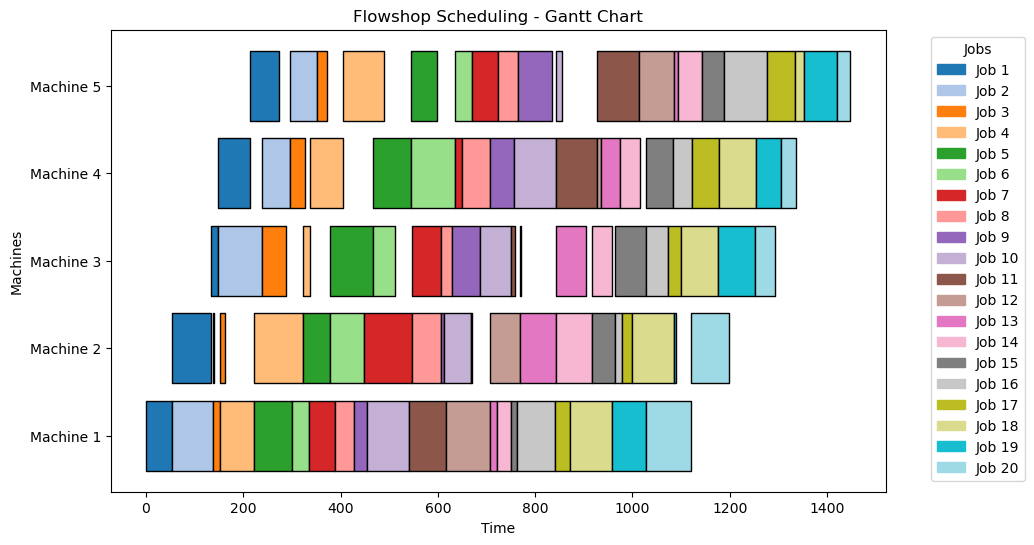

In [867]:
def plot_gantt_chart(sequence, time_matrix, processing_times):
    """Visualize the job schedule as a Gantt chart."""
    num_machines, num_jobs = processing_times.shape
    fig, ax = plt.subplots(figsize=(10, 6))
    colors = plt.cm.get_cmap("tab20", num_jobs)  # Generate unique colors
    
    for j, job in enumerate(sequence):
        for m in range(num_machines):
            start_time = time_matrix[m, j] - processing_times[m, job]
            duration = processing_times[m, job]
            ax.broken_barh([(start_time, duration)], (m - 0.4, 0.8), color=colors(job), edgecolor='black')
    
    ax.set_xlabel("Time")
    ax.set_ylabel("Machines")
    ax.set_yticks(range(num_machines))
    ax.set_yticklabels([f"Machine {m+1}" for m in range(num_machines)])
    ax.set_title("Flowshop Scheduling - Gantt Chart")
    
    # Add legend
    legend_patches = [mpatches.Patch(color=colors(j), label=f"Job {j+1}") for j in sequence]
    ax.legend(handles=legend_patches, title="Jobs", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()
plot_gantt_chart(sequence,time_test,processing_times)

Constructive Solution
Based on the approach of Nawas-Enscore-Ham Heuristic, described as follows:


In [868]:
def constructive(instance):
    machines,n_jobs=instance.shape
    t_ij=np.sum(instance,axis=0) #Time consumed for each job
    sorted_t=np.argsort(-t_ij) #arranges it in Descending order
    seq2=sorted_t.copy()
    span1=span(instance,sorted_t,0)
    seq2[0],seq2[1]=seq2[1],seq2[0]
    span2=span(instance,seq2,0)
    if span2>=span1:
        f_seq=sorted_t
        best_t=span1
    else:
        f_seq=seq2
        best_t=span2
    flag=0
    new_s=f_seq.copy()
    for i in range(2,n_jobs):
        for p in range(i,len(f_seq)):

            new_s[p],new_s[i]=new_s[i],new_s[p]
            new_t=span(instance,new_s,0)
            if new_t<best_t:
                best_t=new_t
                best_seq=list(new_s)
                flag=1
    if flag==0:
        best_seq=list(f_seq)
    return best_seq,best_t




In [869]:
b_seq,best_t=constructive(processing_times)
print(best_t)
time_test,val=span(processing_times,b_seq,1)
print(b_seq)
print(val)


1427.0
[4, 17, 2, 16, 12, 8, 7, 14, 11, 13, 10, 15, 6, 3, 9, 1, 5, 0, 19, 18]
1427.0


C:\Users\wilma\AppData\Local\Temp\ipykernel_14260\4023787354.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab20", num_jobs)  # Generate unique colors


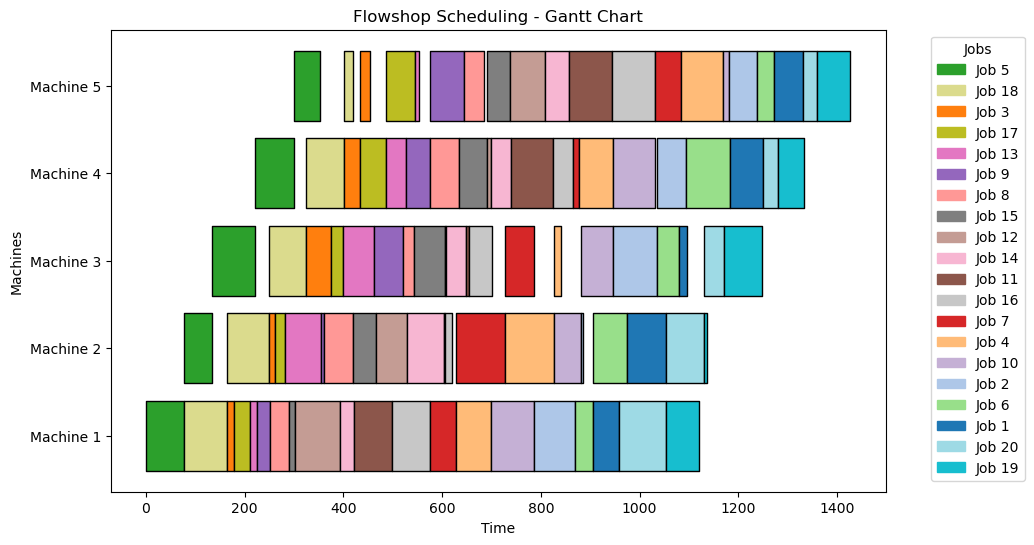

In [870]:
plot_gantt_chart(b_seq,time_test,processing_times)

Now, let's implement Tabu search

In [871]:
def tabu_search(initial_seq,initial_val,instance,max_iter,tabu_tenure):
    #definitios for the intiialization of the tabu search
        #S*<-S0
    s_ast=initial_seq.copy()
        #F(S*)<-F(S0)
    f_ast=initial_val
        #S<-S0
    s=initial_seq.copy()
        #T<-[]
    T=[]
    for _ in range(max_iter):
        N_s=[] #Initialization of N(S)
        #Create the neighbourhood of N(S) based in 1:1 swapping
        new_s=list(s)#creates a copy that will be modified
        # Randomly select pairs of jobs to swap
        num_swaps = random.randint(1,len(s))
        swap_indices = [random.sample(range(1, len(s)), 2) for _ in range(num_swaps)]

        for i, j in swap_indices:                    #Creates a new sequence S'
            new_s[i],new_s[j]=new_s[j],new_s[i]
                #If S' is not in the tabu list, add it to the feasible Neighbourhood Ñ(S)
            if new_s not in T:
                #calculates the time span (F(S'))
                f_s=span(instance,new_s,0)
                #adds the sequence S' and its value f(S') to Ñ(S)
                N_s.append((list(new_s),f_s))

        if N_s: #chacks that the neighbourhood in not empty
            N_s.sort(key=lambda x: x[1]) #sorts the list is ascending order 
            #obtains the solution S' that satisfies S'=argmin(f(s) forall f(s) in N(S))
            s_val,f_val=N_s[0]
            #if f(S') < f (S∗), then set f(S∗) <- f (S') and S* <- S' 
            if f_val < f_ast:
                f_ast=f_val
                s_ast=list(s_val)#.copy()
                #sets  S <-S*;
                s=list(s_ast)#.copy()
        T.append(s)
        #Keeps the length of tabu list under the parameter tabu_tenure
        if len(T)>tabu_tenure:
            T.pop(0) #removes the oldest value to keep |T|=tabu_tenure
    return s


def evaluation(processing_time,max_iter,tabu_tenure):
    s0,f_s0=constructive(processing_time)
    s_ast=tabu_search(s0,f_s0,processing_time,max_iter,tabu_tenure)
    f_ast=span(processing_time,s_ast,0)
    return f_ast,s_ast




1339.0


C:\Users\wilma\AppData\Local\Temp\ipykernel_14260\4023787354.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab20", num_jobs)  # Generate unique colors


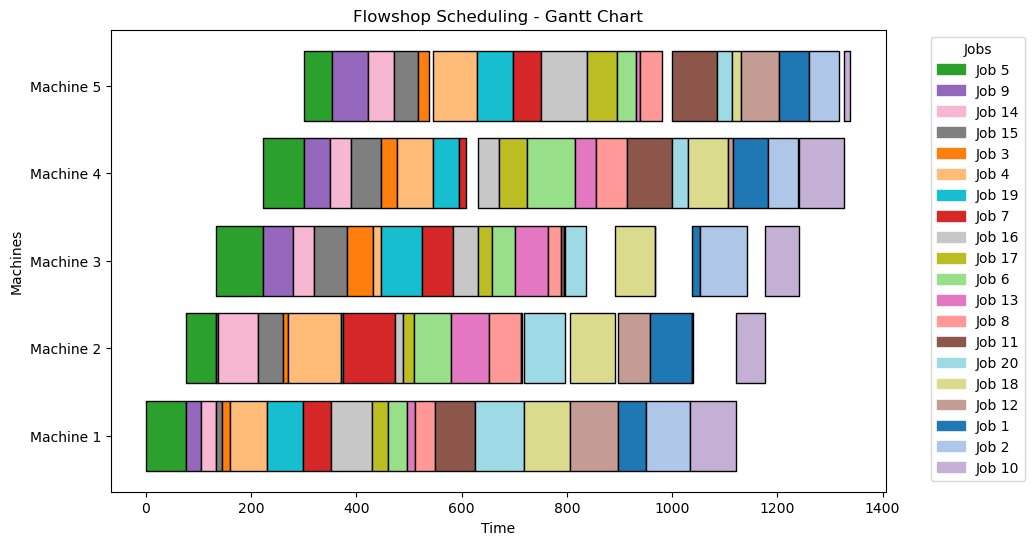

In [872]:
max_iter=100
tabu_tenure=5

a,s_a=evaluation(processing_times,max_iter,tabu_tenure)
print(a)

time_test,val=span(processing_times,s_a,1)
plot_gantt_chart(s_a,time_test,processing_times)

In [ ]:
def read_instances_from_file(filename):
    """Read and parse multiple Flowshop instances from a text file, extracting the processing times and lower bound."""
    instances = []
    lower_bounds = []
    with open(filename, 'r') as file:
        lines = file.readlines()
        i = 0
        while i < len(lines):
            if lines[i].startswith("number of jobs"):
                parts = list(map(int, lines[i + 1].split()))
                num_jobs, num_machines, _, _, lower_bound = parts
                lower_bounds.append(lower_bound)
                i += 3  # Move to processing times
                processing_times = []
                for _ in range(num_machines):
                    processing_times.append(list(map(int, lines[i].split())))
                    i += 1
                instances.append(np.array(processing_times))
            else:
                i += 1
    return instances, lower_bounds

mat, lb=read_instances_from_file("tai20_5.txt")

#Root mean Squared Error
def rmse(predictions, targets):
    return np.sqrt(((np.array(predictions) - np.array(targets)) ** 2).mean())

#Mean absolute error
def mae(predictions, targets):
    return np.mean((np.array(predictions) - np.array(targets))/np.array(targets))

instances=[]
lower_b=[]

files=["tai20_5.txt","tai20_10.txt","tai20_20.txt",
       "tai50_5.txt","tai50_10.txt","tai50_20.txt",
       "tai100_5.txt","tai100_10.txt","tai100_20.txt",
       "tai200_10.txt","tai200_20.txt","tai500_20.txt"]

for i in files:
    m_i,lb_i=read_instances_from_file(i)
    instances.extend(m_i)
    lower_b.extend(lb_i)

n_inst=len(lower_b)
print(n_inst)
sol=[]


for ins in range(n_inst):
    actual=lower_b[ins]
    max_iter=10
    tabu_tenure=5
    print("Instance:")
    print(ins)
    pred,s_a=evaluation(instances[ins],max_iter,tabu_tenure)
    sol.append(pred)
    print("Predicted: ", pred)
    print("lower Bound: ", actual)
    print("Error", (pred-actual)/actual)

metric1=rmse(lower_b,sol)
metric2=mae(lower_b,sol)
print("Metric RMSE: ",metric1)
print("Metric MAE: ",metric2)
print(lower_b[0:1])
print(sol[0:1])

120
Instance:
0
Predicted:  1369.0
lower Bound:  1232
Error 0.1112012987012987
Instance:
1
Predicted:  1458.0
lower Bound:  1290
Error 0.13023255813953488
Instance:
2
Predicted:  1279.0
lower Bound:  1073
Error 0.19198508853681268
Instance:
3
Predicted:  1471.0
lower Bound:  1268
Error 0.16009463722397477
Instance:
4
Predicted:  1405.0
lower Bound:  1198
Error 0.17278797996661102
Instance:
5
Predicted:  1416.0
lower Bound:  1180
Error 0.2
Instance:
6
Predicted:  1384.0
lower Bound:  1226
Error 0.12887438825448613
Instance:
7
Predicted:  1391.0
lower Bound:  1170
Error 0.18888888888888888
Instance:
8
Predicted:  1377.0
lower Bound:  1206
Error 0.1417910447761194
Instance:
9
Predicted:  1259.0
lower Bound:  1082
Error 0.16358595194085027
Instance:
10
Predicted:  1865.0
lower Bound:  1448
Error 0.2879834254143646
Instance:
11
Predicted:  1836.0
lower Bound:  1479
Error 0.2413793103448276
Instance:
12
Predicted:  1701.0
lower Bound:  1407
Error 0.208955223880597
Instance:
13
Predicted:  16

In [ ]:
df=pd.DataFrame([pred,sol],columns=["pred","lower_b"])

filepath = 'resultsh3.xlsx'

df.to_excel(filepath, index=False)


In [ ]:
training_ratio=0.6
idx = random.sample(range(n_inst), int(training_ratio*n_inst))

x_training=instances[idx]
y_training=lower_b[idx]

x_test=instances[~idx]
y_test=lower_b[~idx]

max_iter=[10,50,100,200,300,500,1000]
tabu_tenure=[2,5,10]


y_pred=[]

for ins in range(len(y_training)):
    actual=y_training[ins]
    max_iter=10
    tabu_tenure=5
    pred,s_a=evaluation(x_training[ins],max_iter,tabu_tenure)
    y_pred.append(pred)

metric1=rmse(y_training,y_pred)
metric2=mae(y_training,y_pred)

